<a href="https://colab.research.google.com/github/BharathKanama/Bharathprakash143.github.io/blob/master/Individual_assignment_1_Sentiment_analysis_with_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this individual assignment we will take a look at sentiment analysis task with Naive Bayes classifier.

---

Assignment consists of 3 parts:


*   Data exploration
*   Sentiment classification
*   Report


You can use the following references as a guide for your homework:

* https://www.enjoyalgorithms.com/blog/sentiment-analysis-using-naive-bayes
* https://www.enjoyalgorithms.com/blog/text-data-pre-processing-techniques-in-ml
* https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes
* For precision, recall, f1 refer to https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics

To access dataset:

Option 1: upload data to your Google Drive, then mount the drive

Option 2: upload directly to colab


In [6]:
# To mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First let's import all neccessary for this assignment modules.

In [ ]:
!pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 4.5 MB/s 
     |████████████████████████████████| 24.1 MB 1.3 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=464044f9c4e3d5483937d69b4a0898707e3356a309829a25256940f0dee27f5e
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [4]:
!pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 7.4 MB/s 
     |████████████████████████████████| 24.1 MB 77.7 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=49d80523bf7784f705932b93c7cfd37fc1dc7f7c328cf738d679ae59153fc815
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [5]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import scattertext as st
import spacy
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import metrics
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Now, pick a dataset for the analysis from the following:


*   Financial dataset (https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis)
*   Movie review (https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/data)
* Amazon Kindle Book Review (https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis) - use 'preprocessed_kindle_review.csv and convert rating into sentiment: 1-2: negative, 3: neutral, 4-5: positive
* Steam Reviews (https://www.kaggle.com/datasets/piyushagni5/sentiment-analysis-for-steam-reviews) use train.csv and treat 'user_suggestion' as a Sentiment 1-positive, 0-negative

Download it from kaggle.com and upload to this colab: left menu 'Files'-> 'Upload file'

**Make sure that your file is fully uploaded before proceeding**


# Data Exploration

In [50]:
# Use pd.read_csv to upload dataset [~ 1 line].
# You can use 'usecols' argument to specify which columns to load


# Your code here:
import pandas as pd
dataset = pd.read_csv("/content/sample_data/california_housing_test.csv",usecols=["longitude", "latitude", "total_rooms","population"])






In [51]:
# You can take a look at first 5 entries with the following
dataset.head(5)

,longitude,latitude,total_rooms,population
0,-122.05,37.37,3885.0,1537.0
1,-118.30,34.26,1510.0,809.0
2,-117.81,33.78,3589.0,1484.0
3,-118.36,33.82,67.0,49.0
4,-119.67,36.33,1241.0,850.0


In [52]:
!pip install pandas.core.arrays.datetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pandas.core.arrays.datetimes (from versions: none)
ERROR: No matching distribution found for pandas.core.arrays.datetimes


In [53]:
# from pandas.core.arrays.datetimes import DataFrame
import pandas as pd
from prompt_toolkit import output
from re import X
from textblob.en import positive
# If you don't have an explicit 'sentiment' column, 
# identify which can be used as a proxy and create a 'sentiment' column based on
# the proxy column. 


# Your code here:
# Hint: use '.map' method
def population(x):
  if x > 1000:
    output = 'positive'
  elif 500<x<1000:
    output = 'neutral'
  else:
    output = 'negative'
  return output
dataset['sentiment'] = dataset['population'].apply(population)
    
print(dataset)

      longitude  latitude  total_rooms  population sentiment
0       -122.05     37.37       3885.0      1537.0  positive
1       -118.30     34.26       1510.0       809.0   neutral
2       -117.81     33.78       3589.0      1484.0  positive
3       -118.36     33.82         67.0        49.0  negative
4       -119.67     36.33       1241.0       850.0   neutral
...         ...       ...          ...         ...       ...
2995    -119.86     34.42       1450.0      1258.0  positive
2996    -118.14     34.06       5257.0      3496.0  positive
2997    -119.70     36.30        956.0       693.0   neutral
2998    -117.12     34.10         96.0        46.0  negative
2999    -119.63     34.42       1765.0       753.0   neutral

[3000 rows x 5 columns]


positive    1798
neutral      895
negative     307
Name: sentiment, dtype: int64

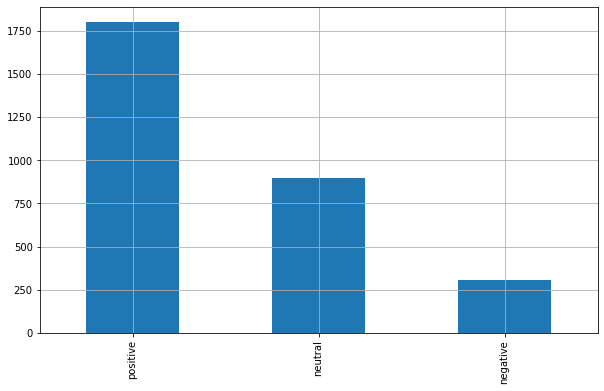

In [54]:
# Now let's take a look at the distribution of labels (i.e. sentiment values)
# across the dataset.

# Display a bar plot based on value counts of the 'sentiment' column [~ 1 line] 

# Your code here:
dataset['sentiment'].value_counts().plot(kind='bar',figsize=(10,6),grid='-')
dataset['sentiment'].value_counts()

**Answer this question in your report:**

What problem we see with the dataset, if any?

If there is a problem, how it can impact classification?

In [55]:
from sklearn.preprocessing import LabelEncoder
# Let's create a separate numerical column 'label', 
# which will be used by our classifier.

# Create a new column 'label' based on values in the 'sentiment' column.
# It is up to you what number to assign to each category. [~ 1 line]
# For example, if there are 3 categories ("positive", "negative", "neutral"),
# I would use something like:
# 
# >>> df[<your sentiment column>].map({"positive":2, "negative":1, "neutral":0})


# Your code here:


def sentiment(x):
  if x == 'positive' :
    output = 2
  elif x == 'neutral' :
    output = 0
  else:
    output = 1
  return output
  
  dataset['label'] = dataset['sentiment'].apply(sentiment)

  print(dataset)


In [62]:
# To further get a notion of our dataset, let's display 
# a word cloud for each sentiment category, present in your dataset. [~ 7 lines per category]

# You are free to use the following code as a general guide.

# First let's extract only positive sentences
# >>> positive = dataset[dataset[<sentiment column>] == "positive"]
# Now let's write all positive entries into one variable
# >>> text = "".join([i for i in positive[<sentence column>]])
# The following creates a WordCloud instance
# >>> wordcloud = WordCloud(background_color="grey").generate(text)
# Finally, let's display our word cloud
# >>> plt.figure(figsize=(15,10))
# >>> plt.imshow(wordcloud, interpolation='bilinear')
# >>> plt.axis("off")
# >>> plt.show()

# Your code here:
positive = dataset[dataset['sentiment'] == "positive"]
text = "".join([i for i in positive['sentiment']])
wordcloud = WordCloud(background_color="grey").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

KeyboardInterrupt: ignored

In [ ]:
# For a more interactive exploration of your dataset, 
# we will use 'scattertext' library, imported as st

# Adjust the following code to work with your dataset
# Leave this line as is
nlp = spacy.load('en_core_web_sm')

# Now let's remove stopwords
nltk.download('stopwords')
stpwrds = stopwords.words('english')

# Let's exclude neutral sentences, if there are any
# Use the following example as a reference:
# >>> ds = dataset[dataset["sentiment"] != "neutral"].copy()

# The following code puts your sentences into lower case and removes stopwords
# Change '<Your Sentences Column>' to the name of the column with sentences.
ds['<Your Sentences Column>'] = ds['<Your Sentences Column>'].apply(
    lambda words: ' '.join(
        str(word).lower() for word in words.split() 
        if str(word).lower() not in stpwrds)
    )

In [ ]:
# Let's create a corpus for the following plot.
# It is possible, that this will take a long time, 
# when the whole ds is provided. In this case, pick a slice of your dataset,
# i.e. ds[:1000], or ds[2000:3500], etc.
corpus = st.CorpusFromPandas(ds,
                             category_col= ... , # provide the name of your sentiment column here
                             text_col= ... , # provide the name of your sentences' column here
                             nlp=nlp
                             ).build()

In [ ]:
# The following code will create an interactive plot and save it as 'my_plot.html'.
# Download it to your machine and open in a separate tab to explore.
# Include a screenshot in your report. 
html = st.produce_scattertext_explorer(
    corpus,
    category="negative",
    not_category_name="positive",
    transform=st.Scalers.log_scale_standardize
)
open('./my_plot.html', 'wb').write(html.encode('utf-8'))

# Sentiment classification

In [ ]:
# Let's preprocess dataset first
# First, put your sentences in a lowercase [~ 1 line]
# Suggestion: create a separate variable (e.g. corpus)
# to store sentences from the dataset

# Your code here


In [ ]:
# Now, let's replace hyperlinks, if any exist [~ 1line]
# Hint: regex for hyperlinks is r"http\S+"

# Your code here


In [ ]:
# Finally, let's remove punctuations
# Hint: regex for punctuations r"[^A-Za-z0-9]+"

# Your code here


In [ ]:
# Now let's remove stopwords
nltk.download('stopwords')
stpwrds = stopwords.words('english')

In [ ]:
# Remove stopwords from the text [~ 1 line]

# Your code here:


In [ ]:
# Lemmatization
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')


# Create an instance of a WhitespaceTokenizer [1 line],
# and WordNetLemmatizer [1 line]

# Perform lemmatization on your sentences,
# for example, if my sentence array is stored 
# in a corpus variable, I would use the following code:
# >>> corpus = corpus.apply(
# >>>    lambda words: ' '.join(
# >>>        lemmatizer.lemmatize(word) for word in tokenizer.tokenize(words)
# >>>        )
# >>>    )

# Your code here:


In [ ]:
# Create an instance of a CountVectorizer [1 line]
# and encode your sentences [~ 1 line]
# hint: look into fit_transform

# Your code here:


In [ ]:
# Create a separate variable, which holds a numpy array of labels [1 line]
# Hint: use to_numpy()

# Your code here:


In [ ]:
# Create a train and test dataset with 'train_test_split' [1 line]

# Your code here:


In [ ]:
# Create an instance of a MultinomialNB model [1 line]
# and fit it with a training data [1 line]

# Your code here:


In [ ]:
# Evaluate your model on a test dataset [~ 1 line]
# Hint: display the accuracy, achieved on a test data

# Your code here 


In [ ]:
# Create an instance of a ComplementNB model [1 line]
# and fit it with a training data [1 line] 

# Your code here:


In [ ]:
# Evaluate your model on a test dataset [~ 1 line]
# Hint: display the accuracy, achieved on a test data

# Your code here 


In [ ]:
# For both models calculate precision, recall and F1 scores [~ 8 lines]

# Your code here:


In [ ]:
# For both models display confusion matrix [~ 6 lines]
# Hint: metrics.confusion_matrix can be used to calculate the matrix
# and metrics.ConfusionMatrixDisplay can be used for plotting

# Your code here:


# Report

In [ ]:
# Finally, compose a report, which will include your thoughts on the data you've explored:
# Include all plots, you've generated accompanied with your analysis.
# Include analysis of 2 classifiers you've used in this analysis. Which of them was better and why?
# Again, include calculated scores and plots, accompanied with your analysis.